# Aufgaben Blatt 4 KI Machine Learning I



## Aufgabe 1 (Lineare Regression)

Bearbeiten Sie die Aufgabe https://github.com/oduerr/ki/blob/main/linear_regression/lr_gradient_descent.ipynb

Versuchen Sie den Code zu verstehen und machen die kleineren Aufgaben, die in dem notebook besprochen werden.

## Aufgabe 2 (Titanic)
In dieser Aufgabe nehmen Sie an der Titanic Challenge (https://www.kaggle.com/c/titanic) teil. Sie können die Aufgabe am eigenen PC lösen oder direkt in Kaggle lösen. Die Daten liegen auch auf Moodle. 

a) Lesen Sie die Trainingsdaten ein und teilen Sie sie in ein Validierungsdatenset (20%) und in ein eigentliches Trainigsdatenset (80%) auf. Finden Sie auf dem Trainigsdatenset eine Regel für das Überleben alleine aufgrund der Klasse des Tickets (Pclass). Wenden Sie diese Regel auf die Validierungsdaten an. Wie gut ist die Genauigkeit (Anteil der korrekten Klassifikationen) auf den Validierungsdaten?  

In [22]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

train_val = pd.read_csv('titanic/train.csv')

train_data, val_data = train_test_split(train_val, test_size=0.2, random_state=1) #random state damit das shuffeling reproduzierbar ist

# Hinweise zum Erzeugen einer Tabelle
# pd.crosstab(...)
ctab = pd.crosstab(train_data['Pclass'], train_data['Survived'], normalize='index')
print(ctab)

# Hinweise um die Accuracy zu berechnen
from sklearn.metrics import accuracy_score

#Regel: wenn Überlebenschance der Klasse > 0.5, dann gilt, dass vermutlicherweise alle Personen dieser Klasse überleben

class_survival_rate = ctab[1]

def predict_survival(pclass):
    if class_survival_rate[pclass] >= 0.5:
        return 1
    else:
        return 0

val_predictions = val_data['Pclass'].apply(predict_survival)

accuracy = accuracy_score(val_data['Survived'], val_predictions)
print(f"Genauigkeit der Vorhersagen: {accuracy:.2f}")

Survived         0         1
Pclass                      
1         0.373563  0.626437
2         0.513333  0.486667
3         0.775773  0.224227
Genauigkeit der Vorhersagen: 0.66


b) Wenden Sie die Regel aus a) auf die Testdaten an und laden Sie Ihre Lösung hoch. 

In [23]:
test_data = pd.read_csv('titanic/test.csv')
pred_survived = test_data['Pclass'].apply(predict_survival)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': pred_survived})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


c) Logistische Regression mit Pclass

Trainieren Sie eine logistische Regression mit den Variablen 'Pclass'. Verwenden Sie die Klasse `sklearn.linear_model.LogisticRegression`. Berechnen Sie die Accuracy auf dem Validierungsset.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

x_train = train_data[['Pclass']]
y_train = train_data['Survived']

x_val = val_data[['Pclass']]
y_val = val_data['Survived']

#Model trainieren
model = LogisticRegression()
model.fit(x_train, y_train)

#trainiertes Model Vorhersagen treffen lassen
val_predictions = model.predict(x_val)

#Genauigkeit der Vorhersagen berechnen
accuracy = accuracy_score(y_val, val_predictions)

print(f"Genauigkeit: {accuracy:.7f}")


Genauigkeit: 0.6592179


d) Coding / Feature engineering 

d.i) Missing Values:

Verwenden Sie nun weitere Features. Die Variable Age enthält Missing values, die Sie durch folgenden code ersetzen können (was passiert da?)

In [25]:
#val_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)
#train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)

#Berechnet den Median des Age-Werts im Trainingsdatensatz (ohne fehlende Werte zu berücksichtigen)
#Ersetzt alle fehlenden Werte (NaN) in der Spalte Age durch diesen Medianwert

age_median = train_data["Age"].median(skipna=True)

val_data["Age"] = val_data["Age"].fillna(age_median)
train_data["Age"] = train_data["Age"].fillna(age_median)

#Zwei Merkmale Pclass und Age
x_train = train_data[['Pclass', 'Age']]
y_train = train_data['Survived']

x_val = val_data[['Pclass', 'Age']]
y_val = val_data['Survived']

#Model trainieren
model = LogisticRegression()
model.fit(x_train, y_train)

# Vorhersage und Accuracy
predictions = model.predict(x_val)
accuracy = accuracy_score(y_val, predictions)
print(f"Genauigkeit mit Pclass und Age: {accuracy:.7f}")

Genauigkeit mit Pclass und Age: 0.6648045


d.ii) Kategorische Variable

Verwenden Sie die Funktion `pd.get_dummies` um die Variablen 'Pclass' and 'Sex' in numerische Werte umzuwandeln. Führen Sie nun eine logistische Regression durch.

In [26]:
#Umwandelung in numerische Werte
x_train_features = pd.get_dummies(train_data[['Pclass', 'Sex']], drop_first=True) #drop_first lässt ein Kategorie entfallen 
x_val_features = pd.get_dummies(val_data[['Pclass', 'Sex']], drop_first=True)

# Age und Fare hinzufügen (weil es numerische Werte sind, werden diese nachhinein hinzugefügt)
x_train_features['Age'] = train_data['Age']
x_train_features['Fare'] =  train_data['Fare']
y_train = train_data['Survived']

x_val_features['Age'] = val_data['Age']
x_val_features['Fare'] = val_data['Fare']
y_val = val_data['Survived']

model = LogisticRegression()
model.fit(x_train_features, y_train)

val_predictions = model.predict(x_val_features)

accuracy = accuracy_score(y_val, val_predictions)
print(f"Genauigkeit: {accuracy:.7f}")

Genauigkeit: 0.7988827


e) Weitere Klassifikatoren. Neben der logistischen Regression, gibt es weitere Klassifikatoren. Der Random-Forest ist ein recht stabiler Klassifikator, was wäre die Performance von diesem Klassifikator.

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train_features, y_train)
val_predictions = rf.predict(x_val_features)

accuracy = accuracy_score(y_val, val_predictions)
print(f"Random Forest Accuracy: {accuracy:.7f}")

Random Forest Accuracy: 0.8156425


f) [optional] Versuchen Sie weitere Features zu erzeugen und laden den besten Klassifikator auf Kaggle hoch. 

## Aufgabe 3 Titanic mit Neuronalen Netzen 

Hinweis: Diese Aufgabe kann erst nach der dritten Vorlesung in ML gemacht werden.

Mit den gleichen Daten, wie in der Aufgabe 2 d. Erstellen Sie ein fully connected neural network und fitten es an die Ttrainingsdaten. Verwenden Sie mindestens zwei hidden Layer. Plotten Sie den Verlauf der Loss Kurve für die Trainings- und Validierungsdaten. Optional: Laden Sie Ihre beste Lösung auf Kaggle hoch. 

Index(['Pclass', 'Sex_male', 'Age', 'Fare'], dtype='object') (712, 4)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3740 - loss: 0.7888 - val_accuracy: 0.4078 - val_loss: 0.7259
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3764 - loss: 0.7204 - val_accuracy: 0.6089 - val_loss: 0.6902
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6881 - loss: 0.6795 - val_accuracy: 0.5922 - val_loss: 0.6739
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5984 - loss: 0.6636 - val_accuracy: 0.5922 - val_loss: 0.6671
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6317 - loss: 0.6483 - val_accuracy: 0.5922 - val_loss: 0.6637
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6316 - loss: 0.6385 - val_accuracy: 0.5922 - val_loss: 0.6602
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6403 - loss: 0.6312 - val_accuracy: 0.5866 - val_loss: 0.6568
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6350 - loss: 0.6300 - val_accuracy: 0.6145 - val_loss:

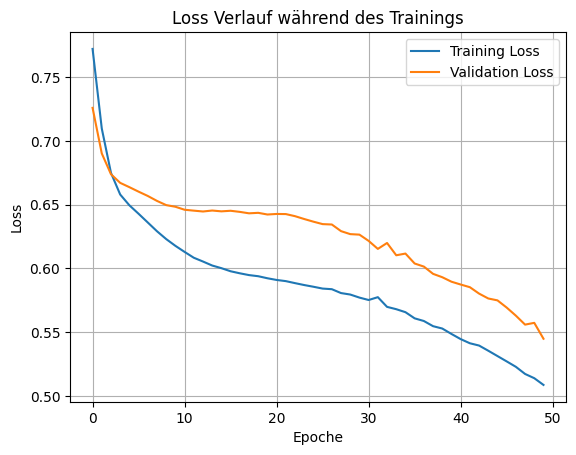

In [28]:
print(x_train_features.columns, x_train_features.shape)

import tensorflow as tf
import tensorflow.keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense

model = Sequential()

#model.add(Dense(16, activation='sigmoid', input_shape=(None, 4))) #We have 4 input features

model.add(Input(shape=(4,))) #Input Schicht
#Hidden Layers
model.add(Dense(32, activation= 'sigmoid'))
model.add(Dense(16, activation= 'sigmoid'))
model.add(Dense(8, activation= 'sigmoid'))
#Output Layer
model.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=opt,
              metrics=['accuracy'])
model.summary()

#Model Training 

result = model.fit(x_train_features, y_train,
                    validation_data=(x_val_features, y_val),
                    epochs=50,
                    batch_size=32,
                    verbose=1)

#plot loss function
plt.plot(result.history['loss'], label='Training Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.title('Loss Verlauf während des Trainings')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()